In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/UDLAP/Ma.Learning/CNN/fer2013/fer2013.csv")
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [4]:
df.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])

In [5]:
label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'} 

In [6]:
np.array(df.pixels.loc[0].split(' ')).reshape(48, 48)

array([['70', '80', '82', ..., '52', '43', '41'],
       ['65', '61', '58', ..., '56', '52', '44'],
       ['50', '43', '54', ..., '49', '56', '47'],
       ...,
       ['91', '65', '42', ..., '72', '56', '43'],
       ['77', '82', '79', ..., '105', '70', '46'],
       ['77', '72', '84', ..., '106', '109', '82']], dtype='<U3')

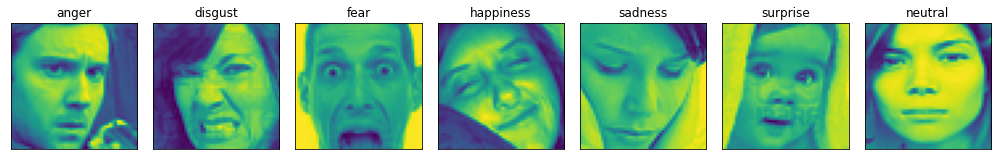

In [7]:
fig = plt.figure(1, (14, 14))
k = 0
for label in sorted(df.emotion.unique()):
    for j in range(1):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')
        k += 1
        ax = plt.subplot(7, 7, k)
        ax.imshow(px)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(label_to_text[label])
        plt.tight_layout()

In [8]:
img_array = df.pixels.apply(lambda x : np.array(x.split(' ')).reshape(48, 48, 1).astype('float32'))

In [9]:
img_array = np.stack(img_array, axis=0)

In [10]:
labels = df.emotion.values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(img_array, labels, test_size = .2)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28709, 48, 48, 1), (7178, 48, 48, 1), (28709,), (7178,))

In [13]:
X_train = X_train/255
X_test = X_test/255

In [14]:
basemodel = tf.keras.models.Sequential([
                                        tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.5),
                                        #
                                        tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.5),
                                        #
                                        tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.5),
                                        #
                                        tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.5),
                                        #                                        
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(1000,activation='relu'),
                                        tf.keras.layers.Dense(7,activation = 'softmax')                          
                                        ])

In [15]:
basemodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 10, 10, 64)        0

In [16]:
basemodel.compile(optimizer= tf.keras.optimizers.Adamax(learning_rate= .0001), loss = 'sparse_categorical_crossentropy', metrics= ['accuracy'])

In [17]:
try:
    os.mkdir('check')
except:
    pass

In [18]:
file_name = 'face_model.h5'
check_path = os.path.join('check', file_name)

call_back = tf.keras.callbacks.ModelCheckpoint(filepath=check_path, 
                                                 monitor='val_accuracy', 
                                                 verbose=1,
                                                 save_freq='epoch',
                                                 save_best_only=True, 
                                                 save_weights_only=False, 
                                                 mode='max')

In [19]:
history = basemodel.fit(X_train, y_train, epochs = 50, validation_split = .1, callbacks= call_back)

Epoch 1/50
808/808 [==============================] - ETA: 0s - loss: 1.8299 - accuracy: 0.2483
Epoch 1: val_accuracy improved from -inf to 0.23650, saving model to check/face_model.h5
808/808 [==============================] - 14s 6ms/step - loss: 1.8299 - accuracy: 0.2483 - val_loss: 1.9029 - val_accuracy: 0.2365
Epoch 2/50
805/808 [============================>.] - ETA: 0s - loss: 1.8211 - accuracy: 0.2502
Epoch 2: val_accuracy improved from 0.23650 to 0.23790, saving model to check/face_model.h5
808/808 [==============================] - 6s 7ms/step - loss: 1.8211 - accuracy: 0.2503 - val_loss: 1.9024 - val_accuracy: 0.2379
Epoch 3/50
808/808 [==============================] - ETA: 0s - loss: 1.8180 - accuracy: 0.2515
Epoch 3: val_accuracy did not improve from 0.23790
808/808 [==============================] - 5s 6ms/step - loss: 1.8180 - accuracy: 0.2515 - val_loss: 1.8953 - val_accuracy: 0.1975
Epoch 4/50
804/808 [============================>.] - ETA: 0s - loss: 1.8158 - accurac

KeyboardInterrupt: ignored

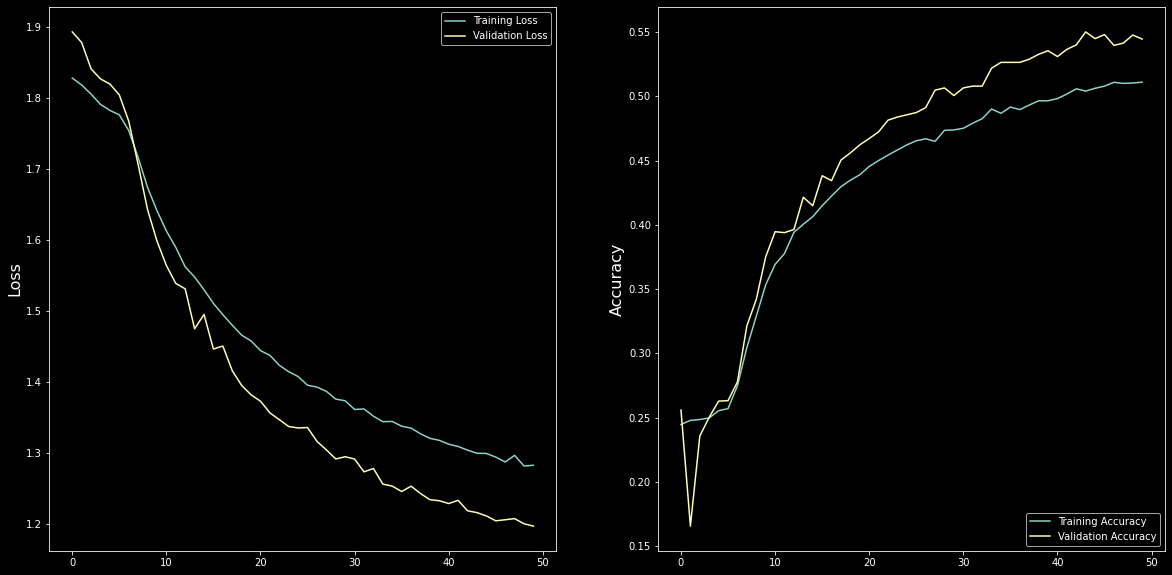

In [ ]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

Correct label -> fear
1/1 [==============================] - 0s 15ms/step
Predictec label -> sadness


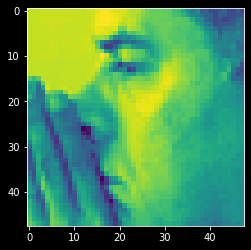

KeyboardInterrupt: ignored

In [ ]:
final_model = tf.keras.models.load_model(check_path)
from IPython.display import clear_output
import time

for k in range(30):
    print(f'Correct label -> {label_to_text[y_test[k]]}')
    predicted_class = final_model.predict(tf.expand_dims(X_test[k], 0)).argmax()
    print(f'Predictec label -> {label_to_text[predicted_class]}')
    plt.imshow(X_test[k].reshape((48, 48)))
    plt.show()
    time.sleep(3)
    clear_output(wait = True)
